In [245]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.manifold import SpectralEmbedding
from scipy.linalg import svd
from sklearn.preprocessing import scale

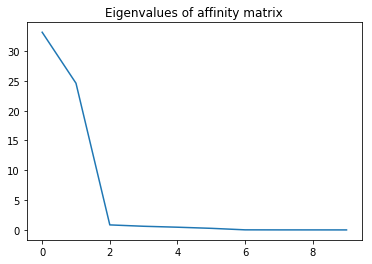

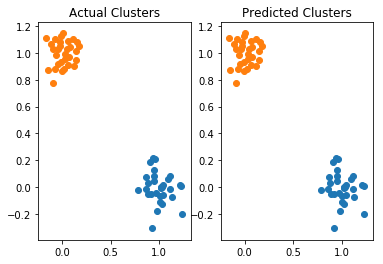

In [246]:
## Test example of spectral clustering

# Create two distributions with same covariance and different means
mean1 = np.array([1.,0.])
mean2 = np.array([0.,1.])
cov = np.array([[0.01,0.],[0.,.01]])
a = np.random.multivariate_normal(mean1, cov, 30)
b = np.random.multivariate_normal(mean2, cov, 30)

# Construct adjacency matrix
data = np.vstack((a,b))
nClusters = 2
m = SpectralClustering(n_clusters=nClusters,affinity='rbf')
m.fit(data)
y = m.fit_predict(data)

# Compute eigenvalues and eigenvectors of affinity matrix
eigenval, eigenvect = np.linalg.eig(m.affinity_matrix_)

# Plot eigenvalues
plt.plot(eigenval[:10])
plt.title('Eigenvalues of affinity matrix')
plt.show()

# Display actual clusters
plt.subplot(121)
plt.title('Actual Clusters')
plt.scatter(a[:,0],a[:,1])
plt.scatter(b[:,0],b[:,1])

plt.subplot(122)
# Plot predicted clusters
for i in range(nClusters):
    plt.scatter(data[y==i][:,0],data[y==i][:,1])
plt.title('Predicted Clusters')
plt.show()

In [247]:
# Load video
video = np.load('video1.npz')['video']
numFrames,height,width,RGB = video.shape

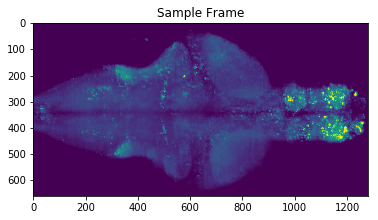

In [248]:
# Convert to grayscale to reduce computation time
video = np.mean(video,axis=3)

# Display sample frame
plt.imshow(video[20,:,:])
plt.title('Sample Frame')
plt.show()

# Reshape each frame into a column vector
video = np.reshape(video,(numFrames,height*width))

In [249]:
window = 10
overlap = int(0.75*window)

numWindows = int(1 + (numFrames - window)/overlap)
windows = np.array([video[i*overlap:i*overlap+window,:].flatten() for i in range(numWindows)])

# Center each sample (frame) and scale to unit variance
scale(windows,axis=0,with_mean=True, with_std=True, copy=False)

u,s,vt = svd(windows,full_matrices=False)

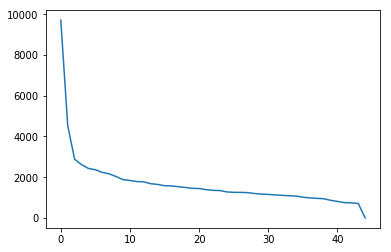

In [250]:
# Plot of singular value spectrum spectrum
plt.plot(s)
plt.show()

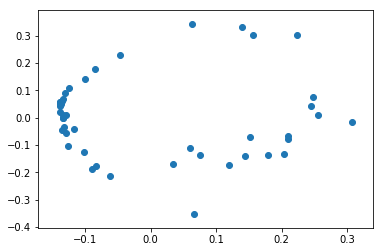

In [251]:
# First 2 columns of U in the SVD decomposition of video
# This corresponds to the projection of the data along the first 2 
# directions of maximum variance
plt.scatter(u[:,0],u[:,1])
plt.show()

In [252]:
m = SpectralClustering(affinity='rbf')
m.fit(u)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=8, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

In [253]:
m.affinity_matrix_.shape

(45, 45)

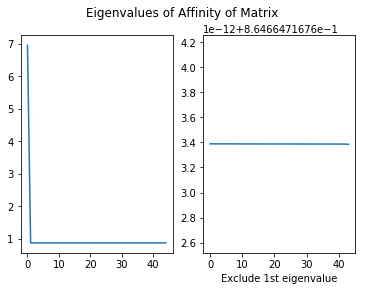

In [254]:
# Plot eigenvalues and eigenvectors of affinity matrix
# For some reason thi
eigenval, eigenvect = np.linalg.eig(m.affinity_matrix_)

# Sort eigenvalues in decreasing order
eigenval = np.sort(eigenval)[::-1]

plt.subplot(121)
plt.plot(eigenval)
plt.subplot(122)

# Exclude the first eigenvalue
plt.plot(eigenval[1:])
plt.xlabel('Exclude 1st eigenvalue')

plt.suptitle('Eigenvalues of Affinity of Matrix')
plt.show()